In [1]:
import numpy as np

# Training Neural Network

## Loss Function

### Mean Squared Error (MSE) function

In [5]:
def mean_squared_error(y, y_hat):
    return 0.5 * (np.sum((y_hat - y)**2))

In [14]:
t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([.1,.05,.6,.0,.05,.1,.0,.1,.0,.0])

print(mean_squared_error(np.array(y), np.array(t)))

y1 = np.array([.1,.05,.1,.0,.05,.1,.0,.6,.0,.0])
print(mean_squared_error(np.array(y1), np.array(t)))

0.09750000000000003
0.5975


### Cross Entropy Error function

In [18]:
def cross_entropy_error(y, y_hat):
    delta = 1e-7
    return -1 * np.sum(y_hat * np.log(y+delta))

In [19]:
print(cross_entropy_error(y, t))
print(cross_entropy_error(y1, t))

0.510825457099338
2.302584092994546


In [21]:
import sys, os
from mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(normalize=False, one_hot_label=True)

print(x_train.shape)
print(x_test.shape)


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(10000, 784)


In [23]:
train_size = x_train.shape[0]
batch_size = 10
random_choice = np.random.choice(train_size, batch_size)

x_batch = x_train[random_choice]
y_batch = y_train[random_choice]

## Differentiation

In [24]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x))/h

In [73]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

In [26]:
def function_1(x):
    return 0.01*(x**2) + 0.1*x

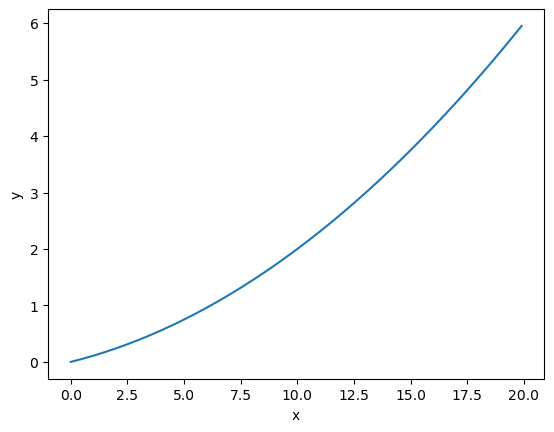

In [50]:
import matplotlib.pyplot as plt

X = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()


In [51]:
print(numerical_diff(function_1, 5))
print(0.02*5 + 0.1)

0.200000000000089
0.2


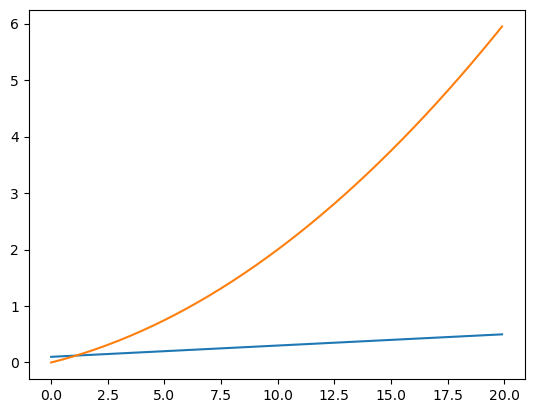

In [54]:
def diff_function_1(x):
    return 0.02*x + 0.1

plt.plot(X, diff_function_1(X))
plt.plot(X, y)
plt.show()

In [55]:
def tangent_line(f, x, X):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return X*d + y

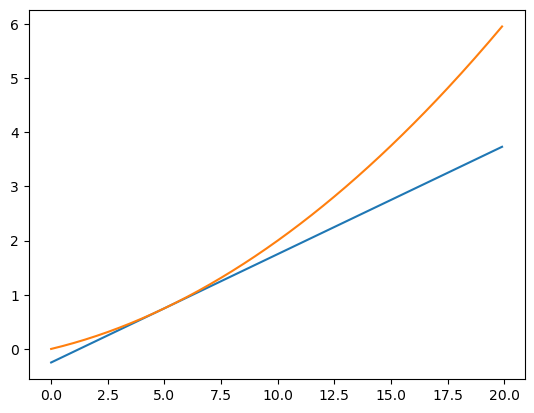

In [58]:
tX = tangent_line(function_1, 5, X)
plt.plot(x, tX)
plt.plot(x, y)
plt.show()

## Partial Derivative

In [94]:
def function_2(X):
    return X[0]**2 + X[1]**2

In [66]:
X = np.array([3.0, 4.0])
print(numerical_diff(function_2, X))

14.000000000002899


In [74]:
def function_tmp1(x0):
    return x0*x0 + 4**2

print(numerical_diff(function_tmp1, 3))

def function_tmp2(x1):
    return 3**2 + x1**2

print(numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


In [101]:
def numerical_gradient(f, X):
    h = 1e-4
    grad = np.zeros_like(X)
    
    for idx in range(X.size):
        orig_val = X[idx]
        
        X[idx] = X[idx] + h
        fxh1 = f(X)
        
        X[idx] = orig_val - h
        fxh2 = f(X)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        X[idx] = orig_val
        
    return grad

print(numerical_gradient(function_2, np.array([3, 4]))) # --> ????
print(numerical_gradient(function_2, np.array([3.0, 4.0])))

[25000 35000]
[6. 8.]


## Gradient Descent

In [114]:
def gradient_descent(lr, step_num, f, init_X):
    X = init_X
    
    for i in range(step_num):
        grad = numerical_gradient(f, X)
        X -= lr*grad
        
    return X

In [118]:
init_X = np.array([-3.0, 4.0])

print(gradient_descent(lr=0.1, step_num=100, f=function_2, init_X=init_X))

[-6.11110793e-10  8.14814391e-10]


어떤 모양의 함수 -> 각 패래미터들에 대해서 기울기(gradient)를 구함 -> 패래미터 * learning rate를 빼준다 -> 그럼 서서히 gradient가 0이 되는곳으로 내려오게 됨

## simpleNet

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [26]:
# sigmoid, softmax -> activation functon, cross_entropy -> loss function

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        pred = softmax(z)
        return cross_entropy_error(pred, t)
    

In [27]:
net = simpleNet()

x = np.array([0.6, 0.9])
y = np.array([0, 0, 1])

pred = net.predict(x)
loss = net.loss(x, y)
loss


1.2819063307788336

In [28]:
f = lambda w: net.loss(x, y_hat)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.23508143, -0.40158599,  0.16650455],
       [ 0.35262215, -0.60237898,  0.24975683]])

In [30]:
W = net.W
x = np.array([0.6, 0.9])
y = np.array([0, 0, 1])

y_hat = np.dot(x, W)
loss = cross_entropy_error(softmax(y_hat), y)

# Summary!!!
dW = numerical_gradient(lambda f: cross_entropy_error(softmax(np.dot(x, W)), y), W)
dW

array([[ 0.23508142,  0.19841382, -0.43349524],
       [ 0.35262213,  0.29762073, -0.65024286]])

In [33]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(output_size)

    def predict(self, X):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        first_layer = sigmoid(np.dot(X, W1) + b1)
        y_hat = softmax(np.dot(first_layer, W2) + b2)

        return y_hat

    def loss(self, X, t):
        y_hat = self.predict(X)
        return cross_entropy_error(y_hat, t)

    def numerical_gradient(self, x, t):
        loss_f = lambda f: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(f, self.params['W1'])
        grads['b1'] = numerical_gradient(f, self.params['b1'])
        grads['W2'] = numerical_gradient(f, self.params['W2'])
        grads['b2'] = numerical_gradient(f, self.params['b2'])

        return grads
    
    def accuracy(self, x, t):
        y_hat = self.predict(x)
        y_hat = np.argmax(y_hat, axis=1)
        t = np.argmax(t, axis=1)

        deno = np.sum(y_hat == t)
        nom = float(y_hat.shape[0])

        return deno / nom

    

In [35]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=100)
net.params['W1'].shape

(784, 100)

## Minibatch Training Implementation

In [37]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = network.numerical_gradient(x_batch, y_batch)
    # grad = network.gradient(x_batch, y_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, y_batch)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_batch, y_batch)
        test_acc = network.accuracy(x_test, y_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    train_loss_list.append(loss)

KeyboardInterrupt: 

In [38]:
np.random.choice(10, 2)

array([4, 8])